In [1]:
import numpy as np
np.random.seed(42)

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from typing import Optional

In [3]:
dataset = load_boston()

In [4]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
x = dataset.data[:, 5:6]
y = dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#### Einfache Lineare Regression

#### Bedeutung
  
- $R^2$: Wie viel Streuung kann von dem Regressionsmodell erklärt werden
- coef: Steigung der Geraden
- intercept: y-Achsenabschnitt
  
#### Symbole

- $\bar{x}$: Mittelwert von $x$
- $\bar{y}$: Mittelwert von $y$
- $\hat{y}$: Prediktion vom Modell

#### Datensatz

- $m$: Anzahl an Samples
- $n$: Anzahl an Features
- $x$: Input-Daten (Features)
- $y$: Output Daten (Targets)

#### Variablen

- $x \in \mathbb{R}^{m,n}$
- $y \in \mathbb{R}^{m,}$
- coef, $\bar{x} \in \mathbb{R}^{n}$
- intercept, $\bar{y} \in \mathbb{R}$

#### Formeln

- $\beta = (X^TX)^{-1}X^Ty$
- coef = $\beta$\[1:\]
- intercept = $\beta$\[0\]
- $\hat{y} = X\beta$
- $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y})^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$

In [6]:
class LinearRegression:
    def __init__(self) -> None:
        self.coef_: Optional[np.ndarray] = None
        self.intercept_: Optional[np.ndarray] = None

    def _add_intercept(self, x: np.ndarray) -> np.ndarray:
        intercepts = np.ones(shape=(x.shape[0]))
        x = np.column_stack((intercepts, x))
        return x

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        x = self._add_intercept(x)
        inner = np.dot(x.T, x)
        inv = np.linalg.inv(inner)
        beta = np.dot(np.dot(inv, x.T), y)
        self.intercept_ = beta[0]
        self.coef_ = beta[1:]

    def predict(self, x: np.ndarray) -> np.ndarray:
        y_pred = np.array(
            [np.dot(self.coef_.T, xi) + self.intercept_ for xi in x]
        )
        return y_pred

    def score(self, x: np.ndarray, y: np.ndarray) -> float:
        y_pred = self.predict(x)
        y_mean = np.mean(y, axis=0)
        frac1 = np.sum(
            [(y[i] - y_pred[i])**2 for i in range(len(y))]
        )
        frac2 = np.sum(
            [(y[i] - y_mean)**2 for i in range(len(y))]
        )
        r2_score = 1.0 - frac1 / frac2
        return r2_score

In [7]:
regr = LinearRegression()
regr.fit(x_train, y_train)
r2_score = regr.score(x_test, y_test)

print(f"Coefs:\n{regr.coef_}")
print(f"Intercept: {regr.intercept_}")
print(f"R2-score: {r2_score}")

Coefs:
[9.1181022]
Intercept: -34.66230743840617
R2-score: 0.45846499343030633


In [8]:
def plot_regressor(regr, x, y):
    lower_bound = np.min(y) - 1
    upper_bound = np.max(y) + 1
    y_pred = regr.predict(x)
    plt.scatter(x, y, color="blue")
    plt.plot(x, y_pred, color="red")
    plt.show()

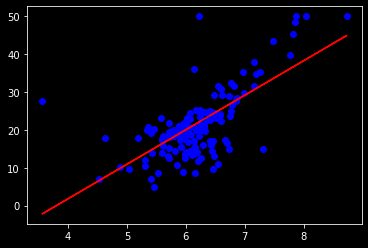

In [9]:
plot_regressor(regr, x_test, y_test)

In [10]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)

    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))

    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

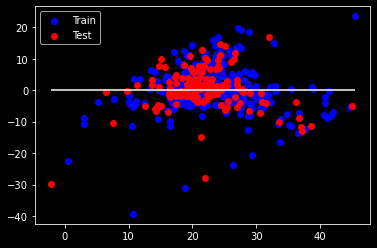

In [11]:
plot_residuals(regr, x_train, y_train, x_test, y_test)